<a href="https://colab.research.google.com/github/Rayhan2802/rayhan.github.io/blob/main/Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
my_file = open('acw_user_data.csv', mode='r')

In [3]:
import csv
import json

# File paths
input_file = 'acw_user_data.csv'

# Load data from CSV
processed_data = []
with open(input_file, mode='r', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    for row in reader:
        # Nest Address
        address = {
            "Street": row.pop("Address Street"),
            "City": row.pop("Address City"),
            "Postcode": row.pop("Address Postcode")
        }

        # Nest Vehicle
        vehicle = {
            "Make": row.pop("Vehicle Make"),
            "Model": row.pop("Vehicle Model"),
            "Year": int(row.pop("Vehicle Year")),
            "Type": row.pop("Vehicle Type")
        }

        # Nest Credit Card
        credit_card = {
            "Start": row.pop("Credit Card Start Date"),
            "End": row.pop("Credit Card Expiry Date"),
            "Number": row.pop("Credit Card Number"),
            "CVV": row.pop("Credit Card CVV"),
            "IBAN": row.pop("Bank IBAN")
        }

        # Cast and rename fields
        row["Age"] = int(row.pop("Age (Years)"))
        row["Distance Commuted"] = float(row.pop("Distance Commuted to Work (Km)"))
        row["Dependents"] = int(row["Dependants"]) if row["Dependants"].strip() else None
        row.pop("Dependants")  # Remove the old field
        row["Pension"] = float(row.pop("Yearly Pension (Dollar)"))
        row["Salary"] = float(row.pop("Yearly Salary (Dollar)"))
        row["Retired"] = row.pop("Retired").strip().lower() == "true"

        # Add nested structures
        row["Address"] = address
        row["Vehicle"] = vehicle
        row["Credit Card"] = credit_card

        # Append to final list
        processed_data.append(row)

In [4]:
print(json.dumps(processed_data[:2], indent=4))

[
    {
        "Employer Company": "N/A",
        "First Name": "Kieran",
        "Last Name": "Wilson",
        "Marital Status": "married or civil partner",
        "Sex": "Male",
        "Age": 89,
        "Distance Commuted": 0.0,
        "Dependents": 3,
        "Pension": 7257.0,
        "Salary": 72838.0,
        "Retired": true,
        "Address": {
            "Street": "70 Lydia isle",
            "City": "Lake Conor",
            "Postcode": "S71 7XZ"
        },
        "Vehicle": {
            "Make": "Hyundai",
            "Model": "Bonneville",
            "Year": 2009,
            "Type": "Pickup"
        },
        "Credit Card": {
            "Start": "08/18",
            "End": "11/27",
            "Number": "676373692463",
            "CVV": "875",
            "IBAN": "GB62PQKB71416034141571"
        }
    },
    {
        "Employer Company": "Begum-Williams",
        "First Name": "Jonathan",
        "Last Name": "Thomas",
        "Marital Status": "married or civi

In [5]:
problematic_rows = []

with open(input_file, mode='r', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    rows = list(reader)  # Read all at once to index rows

    for idx, row in enumerate(rows):
        dependants = row["Dependants"].strip()
        if dependants == "":
            # Fix the value
            row["Dependants"] = "0"
            problematic_rows.append(idx)

# Output the list of problematic rows
print("Problematic rows for dependants:", problematic_rows)

Problematic rows for dependants: [21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


In [6]:
import json

output_file = 'processed.json'

# Write to JSON file
with open(output_file, 'w', encoding='utf-8') as f_out:
    json.dump(processed_data, f_out, indent=4)

print(f"All records successfully written to {output_file}.")

All records successfully written to processed.json.


In [7]:
retired_customers = [person for person in processed_data if person["Retired"]]
employed_customers = [person for person in processed_data if person["Employer Company"].strip() != ""]

# Write retired.json
with open("retired.json", "w", encoding="utf-8") as f_retired:
    json.dump(retired_customers, f_retired, indent=4)

# Write employed.json
with open("employed.json", "w", encoding="utf-8") as f_employed:
    json.dump(employed_customers, f_employed, indent=4)


In [8]:
def should_flag_card(row):
    def parse_mm_yy(date_str):
        mm, yy = date_str.split('/')
        mm = int(mm)
        yy = int(yy)
        year = 2000 + yy if yy <= 49 else 1900 + yy
        return year, mm

    start_y, _ = parse_mm_yy(row["Credit Card"]["Start"])
    end_y, _ = parse_mm_yy(row["Credit Card"]["End"])

    return (end_y - start_y) > 10

flagged_customers = [person for person in processed_data if should_flag_card(person)]

with open("remove_ccard.json", "w", encoding="utf-8") as f_remove:
    json.dump(flagged_customers, f_remove, indent=4)


In [9]:
with open("processed.json", "r", encoding="utf-8") as f:
    customers = json.load(f)

for person in customers:
    salary = person["Salary"]
    commute = person["Distance Commuted"]
    if commute <= 1:
        person["Salary-Commute"] = salary
    else:
        person["Salary-Commute"] = round(salary / commute, 2)

customers.sort(key=lambda x: x["Salary-Commute"])

with open("commute.json", "w", encoding="utf-8") as f_out:
    json.dump(customers, f_out, indent=4)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("acw_user_data.csv")
df

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (Km),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (Dollar),Retired,Yearly Salary (Dollar),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Studio 6 Heather prairie,North Amelia,E9 0HB,48,18.44,Phillips-Pope,04/19,08/26,3563802099155576,908,...,Clark,married or civil partner,0,False,84645,Male,Saturn,Convertible,2015,Van/Minivan
996,Flat 3 Davies run,Greenshire,E7 4UJ,22,19.61,Hughes LLC,05/12,07/28,3591311819315276,675,...,Jones,married or civil partner,0,False,93314,Female,Toyota,Yukon,2015,Van/Minivan
997,Flat 7 Barber motorway,Burrowsshire,L62 8TA,38,6.66,Bailey Group,01/13,05/29,3584931475767707,679,...,Walker,single,0,False,20940,Female,Ford,S6,2020,Sedan
998,00 Tony forks,Abbiebury,NP4 1JL,45,18.13,Foster-Price,04/19,05/23,4090311300716168,775,...,Thomson,married or civil partner,0,False,82412,Male,Scion,Ram 1500 Quad Cab,2015,Pickup


In [12]:
mean_salary = df['Yearly Salary (Dollar)'].mean()
print(mean_salary)

57814.078


In [13]:
median_age = df['Age (Years)'].median()
print(median_age)

54.0


<Figure size 800x500 with 0 Axes>

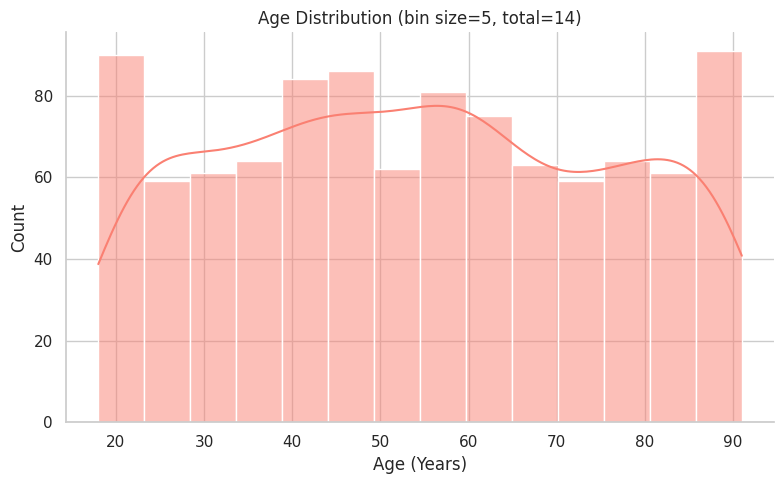

In [14]:
sns.set(style="whitegrid")

ages = df["Age (Years)"]
bin_size = 5
bins = int((ages.max() - ages.min()) / bin_size)

plt.figure(figsize=(8,5))
sns.displot(ages, bins=bins, kde=True, color="salmon", height=5, aspect=1.6)
plt.title(f"Age Distribution (bin size={bin_size}, total={bins})")
plt.xlabel("Age (Years)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("age_distribution.png")
plt.show()

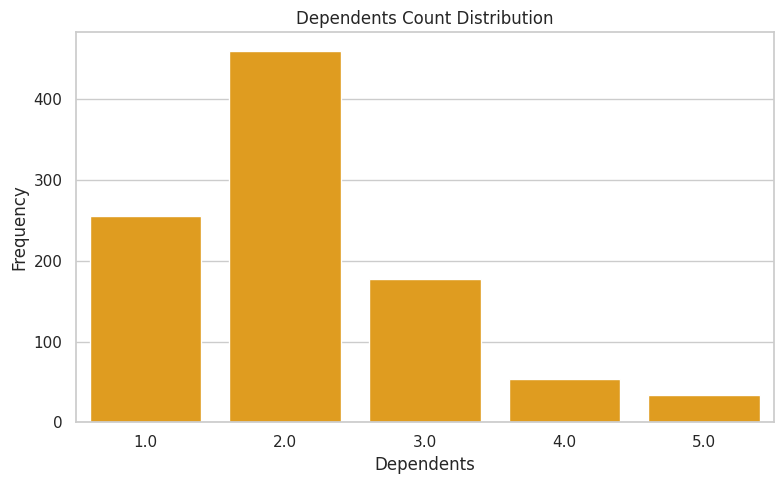

In [15]:
sns.set(style="whitegrid")

deps = df["Dependants"].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=deps.index, y=deps.values, color="orange")
plt.title("Dependents Count Distribution")
plt.xlabel("Dependents")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("dependents_distribution_bar.png")
plt.show()

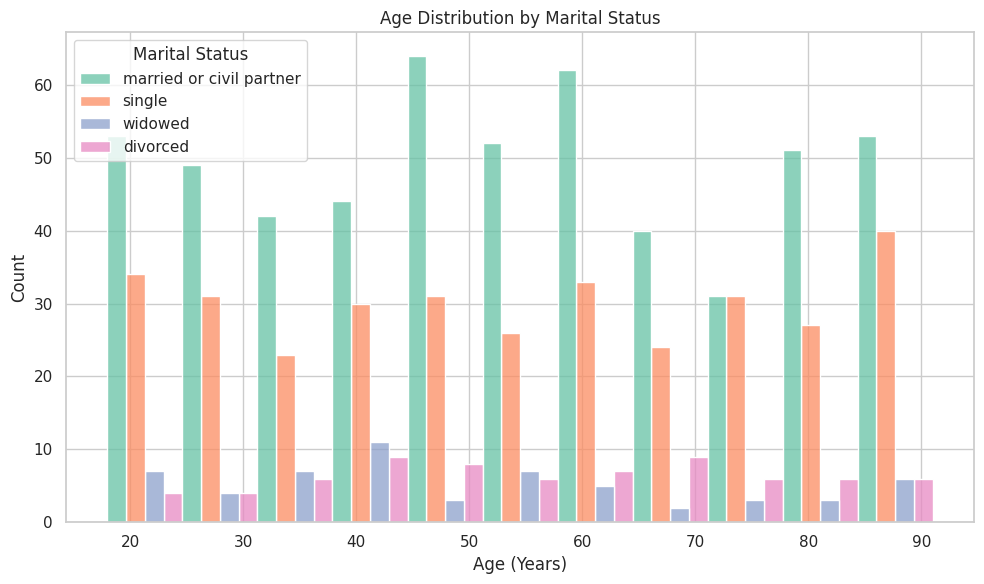

<Figure size 640x480 with 0 Axes>

In [16]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age (Years)", hue="Marital Status", multiple="dodge", palette="Set2")
plt.title("Age Distribution by Marital Status")
plt.xlabel("Age (Years)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
plt.savefig("Age Distribution by Marital Status")

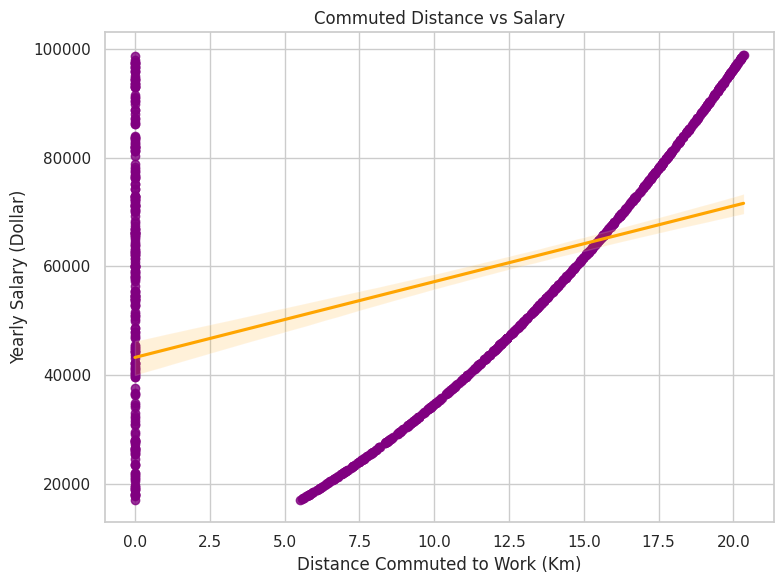

<Figure size 640x480 with 0 Axes>

In [17]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.regplot(data=df,
            x="Distance Commuted to Work (Km)",
            y="Yearly Salary (Dollar)",
            scatter_kws={"color": "purple"},
            line_kws={"color": "orange"})
plt.title("Commuted Distance vs Salary")
plt.xlabel("Distance Commuted to Work (Km)")
plt.ylabel("Yearly Salary (Dollar)")
plt.tight_layout()
plt.show()
plt.savefig("Commuted Distance vs Salary")

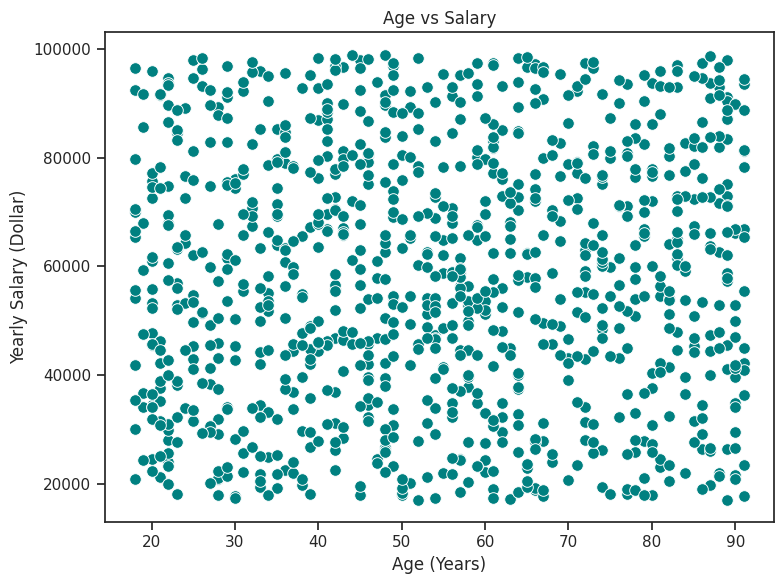

In [18]:
sns.set(style="ticks")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Age (Years)", y="Yearly Salary (Dollar)", color='teal', edgecolor='w', s=70)
plt.title("Age vs Salary")
plt.xlabel("Age (Years)")
plt.ylabel("Yearly Salary (Dollar)")
plt.tight_layout()
plt.savefig("Age_vs_Salary.png")
plt.show()

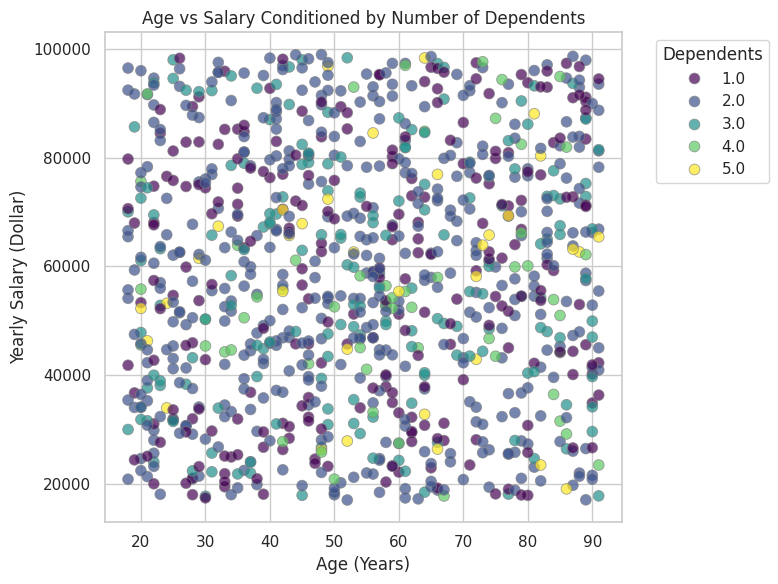

In [19]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="Age (Years)",
    y="Yearly Salary (Dollar)",
    hue="Dependants",
    palette="viridis",
    alpha=0.7,
    edgecolor="gray",
    s=60
)
plt.title("Age vs Salary Conditioned by Number of Dependents")
plt.xlabel("Age (Years)")
plt.ylabel("Yearly Salary (Dollar)")
plt.legend(title="Dependents", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Age_vs_Salary_Conditioned_by_Number_of_Dependents.png")
plt.show()